# Import Library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Baca File

In [2]:
data=pd.read_csv("npl_train.txt")
data.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

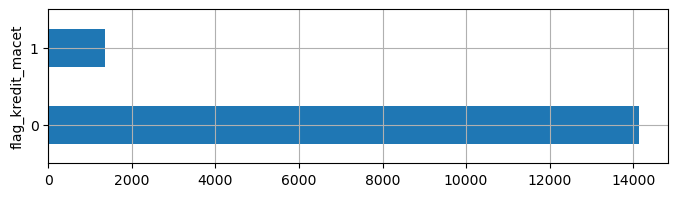

In [4]:
plt.figure(figsize= (8,2))
plt.ylabel('flag_kredit_macet')
plt.xlabel('Count')
data['flag_kredit_macet'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

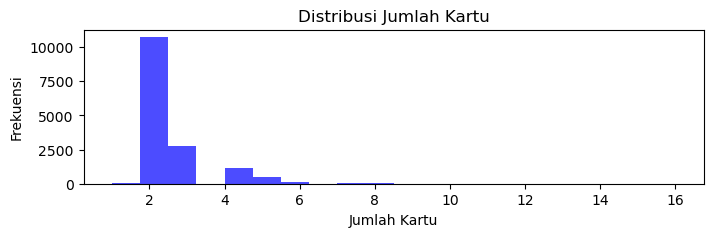

In [5]:
plt.figure(figsize=(8, 2))
plt.hist(data['jumlah_kartu'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Jumlah Kartu')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Kartu')
plt.show()

## Menghapus 'Kode Cabang' & 'X'
kolom 'x' dan 'kode_cabang' dihapus karena sepertinya tidak mempengaruhi hasil akhir/targetnya

In [6]:
# Hapus 'x' dan 'kode_cabang'
data = data.drop(["kode_cabang","X"], axis=1)
data["flag_kredit_macet"].value_counts()

0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

# Split Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data_train, data_test = train_test_split(data,test_size=0.3,random_state=1)
data_train.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
13926,2,5504191,5000000.0,5007877.0,0.0,505959.0,5568683.0,23.6,11.70,32.70,...,0,3.42,505959.0,2784342.0,1.1100,0.10100,0.2860,0.39700,1.1000,1.140000
4558,2,15342443,15000000.0,11147972.0,0.0,367997.0,12103745.0,18.5,5.95,39.10,...,0,5.00,367997.0,6051873.0,0.8070,0.02450,0.1560,0.22200,0.8200,0.562000
3195,3,26153802,22000000.0,26750861.0,0.0,96000.0,26227934.0,0.0,12.80,9.99,...,0,7.67,96000.0,8742645.0,1.1900,0.00436,0.0912,0.12000,1.0600,1.020000
15212,2,844675,5000000.0,411244.0,0.0,0.0,429665.0,100.0,0.00,100.00,...,0,2.25,0.0,214833.0,0.0859,0.00000,0.0000,0.00000,0.1800,0.558000
2619,2,82447,7000000.0,62000.0,0.0,0.0,80345.0,100.0,0.00,25.00,...,0,6.17,0.0,40173.0,0.0115,0.00000,0.0440,0.00001,0.0305,0.000118


In [9]:
data_test = data_test.drop("flag_kredit_macet", 1)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 13926 to 13349
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         10845 non-null  int64  
 1   outstanding                          10845 non-null  int64  
 2   limit_kredit                         10845 non-null  float64
 3   tagihan                              10845 non-null  float64
 4   total_pemakaian_tunai                10845 non-null  float64
 5   total_pemakaian_retail               10845 non-null  float64
 6   sisa_tagihan_tidak_terbayar          10845 non-null  float64
 7   rasio_pembayaran                     10845 non-null  float64
 8   persentasi_overlimit                 10845 non-null  float64
 9   rasio_pembayaran_3bulan              10845 non-null  float64
 10  rasio_pembayaran_6bulan              10845 non-null  float64
 11  skor_delikuensi         

# Target

In [10]:
X=data_train.drop("flag_kredit_macet",1)
X.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
13926,2,5504191,5000000.0,5007877.0,0.0,505959.0,5568683.0,23.6,11.70,32.70,...,0,3.42,505959.0,2784342.0,1.1100,0.10100,0.2860,0.39700,1.1000,1.140000
4558,2,15342443,15000000.0,11147972.0,0.0,367997.0,12103745.0,18.5,5.95,39.10,...,0,5.00,367997.0,6051873.0,0.8070,0.02450,0.1560,0.22200,0.8200,0.562000
3195,3,26153802,22000000.0,26750861.0,0.0,96000.0,26227934.0,0.0,12.80,9.99,...,0,7.67,96000.0,8742645.0,1.1900,0.00436,0.0912,0.12000,1.0600,1.020000
15212,2,844675,5000000.0,411244.0,0.0,0.0,429665.0,100.0,0.00,100.00,...,0,2.25,0.0,214833.0,0.0859,0.00000,0.0000,0.00000,0.1800,0.558000
2619,2,82447,7000000.0,62000.0,0.0,0.0,80345.0,100.0,0.00,25.00,...,0,6.17,0.0,40173.0,0.0115,0.00000,0.0440,0.00001,0.0305,0.000118


In [11]:
y=data_train[["flag_kredit_macet"]]
y.head()

,flag_kredit_macet
13926,0
4558,0
3195,0
15212,0
2619,0


# Penanganan Data Imbalance

# Sebelum Data Imbalance

In [12]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)

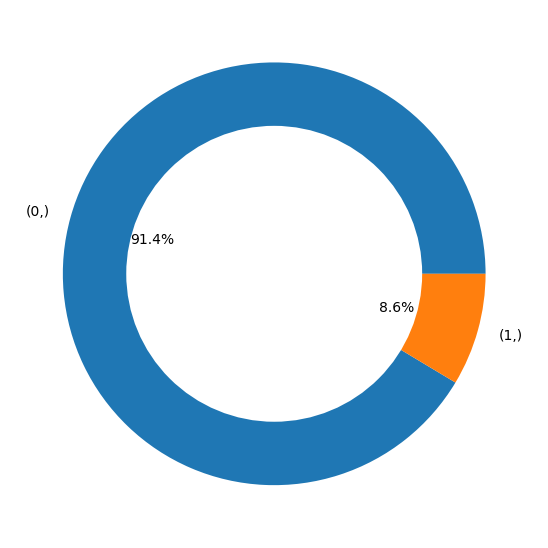

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [14]:
# SEBELUM
xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))


Akurasi :  91.14799446749655
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1987
           1       0.43      0.17      0.24       182

    accuracy                           0.91      2169
   macro avg       0.68      0.57      0.60      2169
weighted avg       0.89      0.91      0.89      2169



# Sesudah Data Imbalance

In [15]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
X,y=over.fit_resample(X,y)

In [16]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)

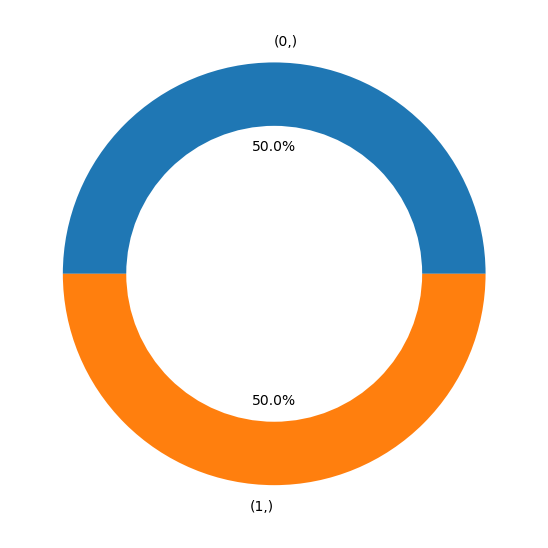

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [18]:
# SESUDAH
xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))


Akurasi :  90.79445145018916
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2019
           1       0.89      0.93      0.91      1946

    accuracy                           0.91      3965
   macro avg       0.91      0.91      0.91      3965
weighted avg       0.91      0.91      0.91      3965



# Membuat Model Prediksi

In [19]:
pred_xgb_test=xgb_model.predict(data_test)

In [20]:
# Membuat kolom baru untuk melihat hasil prediksi
df_pred_result=data_test
df_pred_result["Hasil_Prediksi"]=pred_xgb_test

In [21]:
# Menampilkan tabel untuk melihat hasil prediksi
df_pred_result

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,...,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,Hasil_Prediksi
3576,2,8096704,8000000.0,4073734.0,0.0,1901025.0,5213854.0,65.50,1.24,37.90,...,2.750000,1901025.0,2606927.0,0.652000,0.2380,0.192000,0.043600,0.972000,0.628000,0
8564,2,684568,8000000.0,47263.0,0.0,538655.0,0.0,100.00,0.00,100.00,...,3.670000,538655.0,0.0,0.000000,0.0673,0.027500,0.135000,0.117000,0.158000,0
13670,3,3617686,11000000.0,1933276.0,0.0,586000.0,3155317.0,100.00,0.00,100.00,...,5.750000,586000.0,1051772.0,0.287000,0.0533,0.128000,0.086400,0.359000,0.267000,0
13243,2,3110979,3000000.0,3007042.0,0.0,100000.0,3097253.0,10.10,3.84,12.40,...,0.917000,100000.0,1548627.0,1.030000,0.0333,0.002930,0.000000,0.971000,1.010000,0
804,2,139723,4000000.0,148961.0,0.0,0.0,0.0,0.00,0.00,39.46,...,11.250000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.065723,0.343260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,2,2106550,3000000.0,2106114.0,0.0,0.0,1815941.0,0.00,0.00,7.38,...,2.833333,0.0,907970.5,0.605314,0.0000,0.037972,0.049667,0.730475,0.790908,0
10101,2,17446816,20000000.0,17185537.0,0.0,0.0,16464432.0,31.70,0.00,19.30,...,1.830000,0.0,8232216.0,0.823000,0.0000,0.038500,0.289000,0.936000,0.944000,0
14246,2,4935118,5000000.0,3919776.0,0.0,1322800.0,4888493.0,40.70,0.00,25.10,...,2.920000,1322800.0,2444247.0,0.978000,0.2650,0.267000,0.101000,0.886000,0.588000,0
8858,2,5627381,5000000.0,2678000.0,0.0,2495875.0,5720923.0,63.10,12.30,79.50,...,6.330000,2495875.0,2860462.0,1.140000,0.4990,0.364000,0.220000,0.859000,0.764000,0


# Kesimpulan
Dengan data yang telah diberikan, kami menganalisisnya, melakukan pra-pemrosesan data dengan menghapus kolom yang dianggap tidak berdampak pada hasil prediksi, dan mengatasi ketidakseimbangan data (data imbalance).